In [1]:
import torch
from utils import *
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

In [2]:
# Data parameters
srgan_checkpoint = "./checkpoint_srgan.pth.tar"
srresnet_checkpoint = "./checkpoint_srresnet.pth.tar"

HR_image_path = 'D:/Study/Computer Science/驭风计划/3 深度学习/实验/实验7 图像超分辨/benchmark/benchmark/Set14/HR/baboon.png'
LR_image_path = 'D:/Study/Computer Science/驭风计划/3 深度学习/实验/实验7 图像超分辨/benchmark/benchmark/Set14/LR_bicubic/X4/baboonx4.png'
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")

In [3]:
# Load srresnet models
srresnet = torch.load(srresnet_checkpoint)['model'].to(device)
srresnet.eval()

d:\Software\Anaconda\Lib\site-packages\torch\serialization.py:1101: SourceChangeWarning: source code of class 'models.SRResNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
d:\Software\Anaconda\Lib\site-packages\torch\serialization.py:1101: SourceChangeWarning: source code of class 'models.ConvolutionalBlock' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
d:\Software\Anaconda\Lib\site-packages\torch\serialization.py:1101: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.

SRResNet(
  (conv_block1): ConvolutionalBlock(
    (conv_block): Sequential(
      (0): Conv2d(3, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
      (1): PReLU(num_parameters=1)
    )
  )
  (residual_blocks): Sequential(
    (0): ResidualBlock(
      (conv_block1): ConvolutionalBlock(
        (conv_block): Sequential(
          (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): PReLU(num_parameters=1)
        )
      )
      (conv_block2): ConvolutionalBlock(
        (conv_block): Sequential(
          (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
    )
    (1): ResidualBlock(
      (conv_block1): ConvolutionalBlock(
        (conv_block): Sequential(
          (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1)

In [4]:
# Load models
srgan_generator = torch.load(srgan_checkpoint)['generator'].to(device)
srgan_generator.eval()

d:\Software\Anaconda\Lib\site-packages\torch\serialization.py:1101: SourceChangeWarning: source code of class 'models.Generator' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
d:\Software\Anaconda\Lib\site-packages\torch\serialization.py:1101: SourceChangeWarning: source code of class 'models.Discriminator' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
d:\Software\Anaconda\Lib\site-packages\torch\serialization.py:1101: SourceChangeWarning: source code of class 'torch.nn.modules.activation.LeakyReLU' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump

Generator(
  (net): SRResNet(
    (conv_block1): ConvolutionalBlock(
      (conv_block): Sequential(
        (0): Conv2d(3, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
        (1): PReLU(num_parameters=1)
      )
    )
    (residual_blocks): Sequential(
      (0): ResidualBlock(
        (conv_block1): ConvolutionalBlock(
          (conv_block): Sequential(
            (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): PReLU(num_parameters=1)
          )
        )
        (conv_block2): ConvolutionalBlock(
          (conv_block): Sequential(
            (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          )
        )
      )
      (1): ResidualBlock(
        (conv_block1): ConvolutionalBlock(
          (conv_block): Seque

In [5]:
hr_img = Image.open(HR_image_path, mode="r")
hr_img = hr_img.convert('RGB')
lr_img = Image.open(LR_image_path, mode="r")
lr_img = lr_img.convert('RGB')

In [6]:
# Bicubic Upsampling
bicubic_img = lr_img.resize((hr_img.width, hr_img.height), Image.BICUBIC)
# Super-resolution (SR) with SRGAN
sr_img_srgan = srgan_generator(convert_image(lr_img, source='pil', target='imagenet-norm', device=device).unsqueeze(0).to(device))
sr_img_srgan = sr_img_srgan.squeeze(0).detach()
sr_img_srgan = convert_image(sr_img_srgan, source='[-1, 1]', target='pil', device=device)

In [7]:
# Super-resolution (SR) with SRResNet
sr_img_srresnet = srresnet(convert_image(lr_img, source='pil', target='imagenet-norm', device=device).unsqueeze(0).to(device))
sr_img_srresnet = sr_img_srresnet.squeeze(0).detach()
sr_img_srresnet = sr_img_srresnet.cpu()  # 将Tensor从GPU转移到CPU 
sr_img_srresnet = convert_image(sr_img_srresnet, source='[-1, 1]', target='pil', device=device)

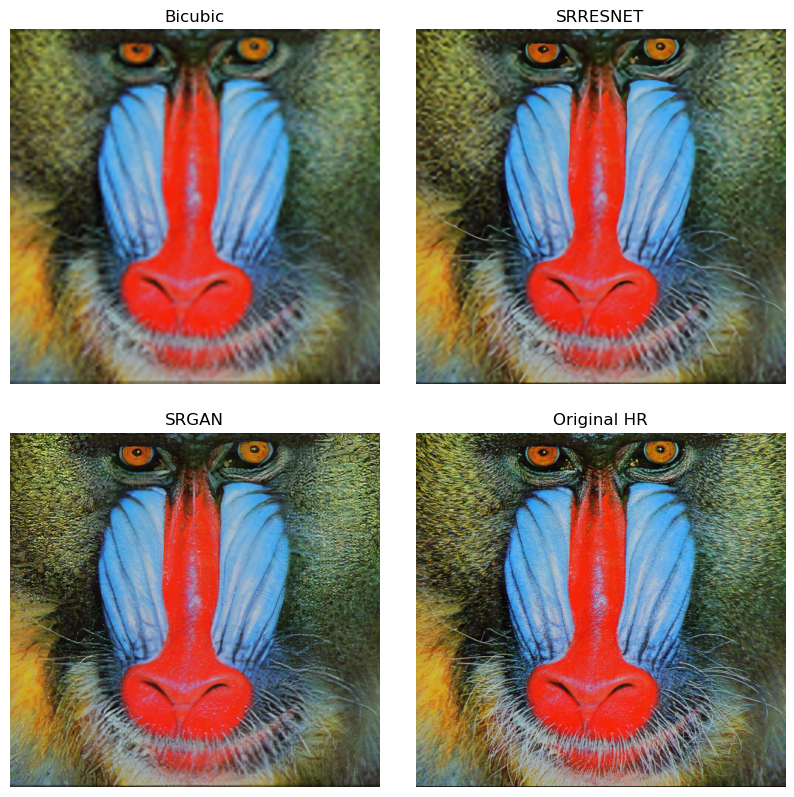

In [8]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(bicubic_img)
axs[0, 0].axis('off')
axs[0, 0].set_title('Bicubic')

axs[0, 1].imshow(sr_img_srresnet)
axs[0, 1].axis('off')
axs[0, 1].set_title('SRRESNET')

axs[1, 0].imshow(sr_img_srgan)
axs[1, 0].axis('off')
axs[1, 0].set_title('SRGAN')

axs[1, 1].imshow(hr_img)
axs[1, 1].axis('off')
axs[1, 1].set_title('Original HR')

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()